In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib inline
import matplotlib.pylab as plt

In [2]:
from matplotlib import pylab
pylab.rcParams['figure.figsize'] = (10, 5)

In [3]:
import ld_gan
from time import time
import numpy as np
from ld_gan.utils.model_handler import apply_model
import sklearn
from ld_gan.visualize import disp

In [44]:
n_interpol = 10

In [4]:
X, Y = ld_gan.data_proc.data_loader.load_data(2, verbose=1)

100%|██████████| 6/6 [09:11<00:00, 82.02s/it] 

load data from '/export/home/oblum/projects/ld_gan/data/celebA/jpg_64'


In [28]:
project , epoch = "xc_11111.py", 9
enc = ld_gan.utils.model_handler.load_model(project , epoch, "enc")
gen = ld_gan.utils.model_handler.load_model(project , epoch, "gen")
dis = ld_gan.utils.model_handler.load_model(project , epoch, "dis")

loaded model 'projects/xc_11111.py/model/e_0009.pth'
loaded model 'projects/xc_11111.py/model/g_0009.pth'
loaded model 'projects/xc_11111.py/model/d_0009.pth'


In [169]:
z_all = ld_gan.utils.model_handler.apply_model(enc, X, 256)

In [29]:
sampler = ld_gan.sample.nn_sampler_life(enc, 
                                        X, Y, 
                                        256, 
                                        nn_search_radius = 50,
                                        n_neighbors = 5)

In [197]:
x_batch, y_batch, z_batch, batch_idxs, nn_idxs, sr_idxs = sampler.next()

In [198]:
trip_enc = ld_gan.train_ops.TripletEnc(enc, gen, dis, X, 0.0001, 
                                       logging=False, visualize=True)

anc / pos / neg


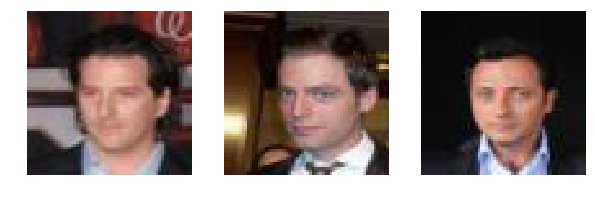

all sorted


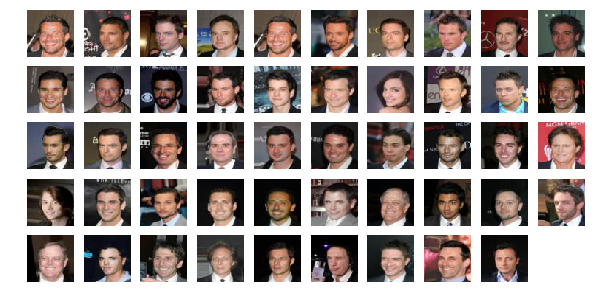

compare


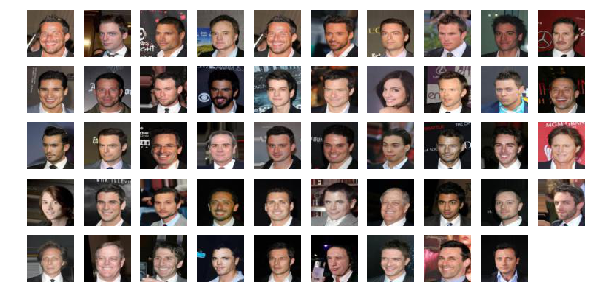

In [209]:
loss = trip_enc.train(x_batch, y_batch, z_batch, batch_idxs, nn_idxs, sr_idxs, z_all)

In [ ]:
            print "max score:", ds[0].max(), "    min score:", ds[0].min()
                
            
            print "Anchor"
            ld_gan.visualize.disp([vis_imgs])
            
            print "all sorted"
            sorted_args = np.argsort(-ds[0])
            abs_args = (sr_idxs[0])[sorted_args]
            sorted_imgs = self.imgs[abs_args]
            ld_gan.visualize.disp_array(sorted_imgs, (5, 10))
            
            print "interpolation positives"
            zs = apply_models(sorted_imgs, None, self.enc)
            for i1 in range(n_pos):
                zs_ipol = []
                for i2 in range(n_interpol):
                    f1 = (i2+1)/float(n_interpol+1)
                    f2 = 1 - f1
                    zs_ipol.append(f1*zs_anc[0] + f2*zs_potential[0, i1])
                xs_ipol = apply_models(np.array(zs_ipol), None, self.gen)
                ds_ipol = apply_models(np.array(xs_ipol), None, self.dis)
                print np.min(ds_ipol)
                ld_gan.visualize.disp(xs_ipol)
                
            print "interpolation negatives"
            zs = apply_models(sorted_imgs, None, self.enc)
            for i1 in range(n_sr_zs - n_neg, n_sr_zs):
                zs_ipol = []
                for i2 in range(n_interpol):
                    f1 = (i2+1)/float(n_interpol+1)
                    f2 = 1 - f1
                    zs_ipol.append(f1*zs_anc[0] + f2*zs_potential[0, i1])
                xs_ipol = apply_models(np.array(zs_ipol), None, self.gen)
                ds_ipol = apply_models(np.array(xs_ipol), None, self.dis)
                print np.min(ds_ipol)
                ld_gan.visualize.disp(xs_ipol)